# **ANALYSIS OF COVID-19 IN SOUTH AMERICA**

***
- - -

Some of the essential questions for developing this project are related to the number of cases on every country of the region, the number of deceased, the number of people vaccinated, etc.

The data used for the analysis has been aqcuired from the covid-dateset csv pointed at https://github.com/owid/covid-19-data/tree/master/public/data. It contains a collection of the COVID-19 data maintained by Our World in Data, from February 2020 up to September 2022, and collects information from 218 countries from around the world. The information outside the scope of this project was despised.

The tools used to handle the data were the packages `Numpy` and `Pandas`, and for visualization, the packages used were `Matplotlib` and `Seaborn`.

***
- - -

### **TABLE OF CONTENTS**

#### **1. Imports and reading dataset.**
In this step the packages used for the analysis are imported, and the dataset is loaded for further analysis.

#### **2. Data preparation: Wrangling**
Data wrangling, sometimes referred to as data munging, is the process of transforming and mapping data from one "raw" data form into another format with the intent of making it more appropriate and valuable for a variety of downstream purposes such as analytics. The goal of data wrangling is to assure quality and useful data.
In this step problems like missing, invalid, and inconsistent values have been addressed.

#### **3. Exploratory Data Analysis (EDA) and Visualization.**
In this step the dataset is analyzed to perform initial investigations to discover patterns, spot anomalies, to test hypotesis and to check assumptions with the help of summary statistics and graphical representations.
The distribution, correlation, relationship, composition and comparison of the data is addressed in this step.

#####   **3.1. Quantitive and qualitative analysis: Asking and Answering Questions.**
1. Did countries with more smokers had a bigger rate of death between the infected?
2. Is the rate of death higher in countries with a big share of the population older than 65 years old?
3. Which countries were the first to start applying vaccines against Covid-19? Are these countries the more developed?
4. Is human development index related to the number of infections? In other words, are countries less developed more affected by the virus?

#### **4. Presentation of findings: Conclusions.**
In this step the most significants insights are presented.



***
- - -

###  **1. Imports and Reading Dataset.**


First we have to import the libraries and packages used for the project.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns

plt.style.use('ggplot')

# Use `plotly` for the plotting backend
# pd.options.plotting.backend = "plotly"

Then, with the pandas function `pd.read_csv()`, we open and read the comma-separated value (CSV) file used as the "raw" dataframe.

In [2]:
# Disclaimer: This website is updated every day. Some information can vary along the time.
df_raw = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

We can verify that the file has DataFrame type with `type()` function.

In [3]:
type(df_raw)

pandas.core.frame.DataFrame

***
- - -

### **2. Data Preparation: Wrangling/Munging.**


We can verify the number of rows and columns of the dataframe with `df.shape` (rows, columns)

In [4]:
print(f'The raw dataset contains {df_raw.shape[0]:,} rows and {df_raw.shape[1]} columns')

The raw dataset contains 221,491 rows and 67 columns


With `head` we can observe the first five rows of the dataframe, and with `tail` we can observe the last five rows of the dataframe.

In [5]:
df_raw.head() 
# we can adjust the displayed number of rows by typing the desired number inside the parenthesis.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [6]:
df_raw.tail()
# we can adjust the displayed number of rows by typing the desired number inside the parenthesis.

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
221486,ZWE,Africa,Zimbabwe,2022-10-01,257465.0,0.0,21.000,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221487,ZWE,Africa,Zimbabwe,2022-10-02,257517.0,52.0,25.286,5602.0,0.0,0.429,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221488,ZWE,Africa,Zimbabwe,2022-10-03,257538.0,21.0,28.000,5603.0,1.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221489,ZWE,Africa,Zimbabwe,2022-10-04,257568.0,30.0,27.429,5603.0,0.0,0.571,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN
221490,ZWE,Africa,Zimbabwe,2022-10-05,257568.0,0.0,22.714,5603.0,0.0,0.143,...,1.6,30.7,36.791,1.7,61.49,0.571,NaN,NaN,NaN,NaN


With `df.dtypes` we can see the type of data inside every row.

In [7]:
df_raw.dtypes

iso_code                                    object
continent                                   object
location                                    object
date                                        object
total_cases                                float64
                                            ...   
human_development_index                    float64
excess_mortality_cumulative_absolute       float64
excess_mortality_cumulative                float64
excess_mortality                           float64
excess_mortality_cumulative_per_million    float64
Length: 67, dtype: object

With `df.describe()` we can generate descriptive statistics.

In [8]:
df_raw.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,2.125320e+05,2.122820e+05,2.110860e+05,1.934080e+05,193359.000000,192179.000000,211560.000000,211310.000000,210119.000000,192449.000000,...,137530.000000,135647.000000,89257.000000,161517.000000,206951.000000,177038.000000,7.460000e+03,7460.000000,7507.000000,7460.000000
mean,4.294845e+06,1.244454e+04,1.248212e+04,7.298226e+04,140.701447,141.430936,57878.752844,190.194919,190.343266,679.351601,...,10.674173,32.808363,50.837676,3.084423,73.625923,0.724844,4.709611e+04,9.798906,14.503727,1303.267724
std,2.689945e+07,8.583264e+04,8.391487e+04,3.758753e+05,737.107722,722.658092,103329.453527,1054.490786,668.337080,965.847914,...,10.624245,13.534180,31.839528,2.549922,7.447580,0.149689,1.305588e+05,13.596222,26.623740,1698.241936
min,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,0.001000,0.000000,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,4.103000e+03,0.000000e+00,6.286000e+00,1.110000e+02,0.000000,0.000000,1032.439500,0.000000,1.388000,28.638000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,2.867500e+01,0.430000,-0.160000,19.952271
50%,4.720500e+04,5.700000e+01,9.657100e+01,1.141000e+03,1.000000,1.571000,9832.536000,7.972000,19.762000,205.994000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.716250e+03,7.300000,7.380000,772.399627
75%,5.071340e+05,9.740000e+02,1.140393e+03,9.627000e+03,14.000000,16.143000,69687.474750,98.941500,136.596000,1006.401000,...,19.300000,41.300000,82.502000,4.200000,79.070000,0.845000,3.355805e+04,15.362500,20.150000,2022.755636
max,6.197130e+08,4.081728e+06,3.436268e+06,6.552099e+06,17737.000000,14858.143000,656238.177000,195005.313000,36401.607000,6425.121000,...,44.000000,78.100000,100.000000,13.800000,86.750000,0.957000,1.220577e+06,76.550000,376.250000,9766.306877


In [9]:
# we can use all rows and values for a more in deep description.
df_raw.describe(include='all')

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,221491,208753,221491,221491,2.125320e+05,2.122820e+05,2.110860e+05,1.934080e+05,193359.000000,192179.000000,...,137530.000000,135647.000000,89257.000000,161517.000000,206951.000000,177038.000000,7.460000e+03,7460.000000,7507.000000,7460.000000
unique,244,6,244,1009,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,ARG,Africa,Argentina,2021-09-08,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1009,51188,1009,243,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,NaN,NaN,NaN,4.294845e+06,1.244454e+04,1.248212e+04,7.298226e+04,140.701447,141.430936,...,10.674173,32.808363,50.837676,3.084423,73.625923,0.724844,4.709611e+04,9.798906,14.503727,1303.267724
std,NaN,NaN,NaN,NaN,2.689945e+07,8.583264e+04,8.391487e+04,3.758753e+05,737.107722,722.658092,...,10.624245,13.534180,31.839528,2.549922,7.447580,0.149689,1.305588e+05,13.596222,26.623740,1698.241936
min,NaN,NaN,NaN,NaN,1.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,0.000000,0.000000,...,0.100000,7.700000,1.188000,0.100000,53.280000,0.394000,-3.772610e+04,-28.450000,-95.920000,-1884.678982
25%,NaN,NaN,NaN,NaN,4.103000e+03,0.000000e+00,6.286000e+00,1.110000e+02,0.000000,0.000000,...,1.900000,21.600000,20.859000,1.300000,69.500000,0.602000,2.867500e+01,0.430000,-0.160000,19.952271
50%,NaN,NaN,NaN,NaN,4.720500e+04,5.700000e+01,9.657100e+01,1.141000e+03,1.000000,1.571000,...,6.300000,31.400000,49.839000,2.500000,75.050000,0.743000,5.716250e+03,7.300000,7.380000,772.399627
75%,NaN,NaN,NaN,NaN,5.071340e+05,9.740000e+02,1.140393e+03,9.627000e+03,14.000000,16.143000,...,19.300000,41.300000,82.502000,4.200000,79.070000,0.845000,3.355805e+04,15.362500,20.150000,2022.755636


As we can observe, the dataset contains a lot more information than the one needed for this project. In order to proceed, we need to adjust and reshape the dataframe.

In [10]:
# with value_counts() we can count the times a value repeats inside the column desired.
df_raw.value_counts('continent')

continent
Africa           51188
Europe           47899
Asia             47530
North America    34068
Oceania          15769
South America    12299
dtype: int64

To adjust the dataframe to our needs, we take a slice of the full dataset: 

In [11]:
# We define our new dataframe with the rreset_indexere continent == 'South America'.
df = df_raw.loc[df_raw['continent'] == 'South America'].reset_index(drop=True).copy()
df

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,ARG,South America,Argentina,2020-01-01,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
1,ARG,South America,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
2,ARG,South America,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
3,ARG,South America,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
4,ARG,South America,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,...,16.2,27.7,NaN,5.0,76.67,0.845,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,VEN,South America,Venezuela,2022-10-01,544860.0,57.0,58.571,5816.0,2.0,0.286,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
12295,VEN,South America,Venezuela,2022-10-02,544874.0,14.0,60.571,5816.0,0.0,0.286,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
12296,VEN,South America,Venezuela,2022-10-03,544884.0,10.0,50.429,5816.0,0.0,0.286,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN
12297,VEN,South America,Venezuela,2022-10-04,544884.0,0.0,37.714,5816.0,0.0,0.286,...,NaN,NaN,NaN,0.8,72.06,0.711,NaN,NaN,NaN,NaN


In [12]:
print(f'The new dataset contains {df.shape[0]:,} rows and {df.shape[1]} columns')

The new dataset contains 12,299 rows and 67 columns


Now, let's see some additional information of our new dataframe. 

In [13]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.223600e+04,12205.000000,12132.000000,11161.000000,11138.000000,11077.000000,12236.000000,12205.000000,12132.000000,11161.000000,...,8571.000000,7627.000000,5649.000000,11384.000000,12299.000000,11384.000000,656.000000,656.000000,656.000000,656.000000
mean,2.302889e+06,5237.840885,5260.893294,66860.500941,117.235231,117.759157,60654.943935,176.705749,177.585974,1502.958742,...,11.001248,24.684437,66.022767,2.085427,75.584494,0.763813,82142.959146,31.263643,31.650122,2288.633556
std,5.527998e+06,15031.781166,14040.816777,136046.689850,313.649001,296.802003,75499.947509,2099.039618,867.586853,1439.704159,...,9.340868,11.031226,19.037355,1.107747,3.340154,0.050872,115890.119432,21.916312,44.483344,1709.078216
min,1.000000e+00,0.000000,0.000000,1.000000,0.000000,0.000000,0.005000,0.000000,0.000000,0.005000,...,2.000000,12.300000,25.383000,0.800000,69.910000,0.682000,-8805.400000,-8.230000,-21.950000,-716.524724
25%,2.346100e+04,9.000000,71.250250,1226.000000,1.000000,2.143000,9421.838500,2.809000,17.195500,205.462000,...,4.800000,17.900000,65.386000,1.500000,72.060000,0.728000,17402.600000,14.987500,4.675000,771.307775
50%,3.996810e+05,485.000000,764.571000,13984.000000,12.000000,15.857000,32871.685000,44.363000,62.992500,1295.107000,...,7.400000,21.600000,77.159000,1.710000,76.670000,0.765000,48928.800000,30.500000,16.375000,2195.708386
75%,1.634489e+06,2866.000000,3381.000000,59845.000000,71.000000,76.000000,91724.704250,151.284000,161.599750,2257.675000,...,14.000000,27.700000,79.602000,2.800000,77.290000,0.817000,110282.000000,50.980000,42.007500,3549.424539
max,3.469902e+07,287149.000000,189227.000000,686573.000000,4148.000000,3112.286000,512752.391000,195005.313000,35258.843000,6425.121000,...,34.200000,42.900000,80.635000,5.000000,81.440000,0.851000,811307.000000,76.550000,376.250000,5593.470559


In [14]:
# All the columns of the dataset can be seen here:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

By knowing what every column represents, we can adjust the dataframe to be more suitable for this analysis. (The description of every column can be seen at the github repo cited at the begining. )

In [15]:
# Setting a new dataframe with the desired columns
df_2 = df[['location', 'date', 'total_cases', 'new_cases',
        'total_deaths', 'new_deaths', 'total_vaccinations',
        'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
        'population', 'median_age', 'aged_65_older', 'aged_70_older',
        'gdp_per_capita', 'female_smokers', 'male_smokers', 'life_expectancy',
        'human_development_index']].copy()

#### **2.1 Working with missing, incorrect and invalid data.**

To avoid possible misleading mathematical operations, we have to take care of the missing, incorrect and invalid data.
Some pandas functions excludes by default NaN values, but other numerical operations don't, so in order to perform a good analysis, is vital to tackle these different types of data according to their case.

In [16]:
df_2.info(max_cols=len(df))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12299 entries, 0 to 12298
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   location                 12299 non-null  object 
 1   date                     12299 non-null  object 
 2   total_cases              12236 non-null  float64
 3   new_cases                12205 non-null  float64
 4   total_deaths             11161 non-null  float64
 5   new_deaths               11138 non-null  float64
 6   total_vaccinations       5097 non-null   float64
 7   people_vaccinated        5012 non-null   float64
 8   people_fully_vaccinated  4913 non-null   float64
 9   total_boosters           3127 non-null   float64
 10  population               12299 non-null  float64
 11  median_age               11384 non-null  float64
 12  aged_65_older            11384 non-null  float64
 13  aged_70_older            11384 non-null  float64
 14  gdp_per_capita        

If we take a look at the number of non-null elements of each column we can see that many columns, for example the column `total_boosters`, contain several null or NaN values.

In [17]:
df_2.isna().sum().sort_values(ascending=False)

total_boosters             9172
people_fully_vaccinated    7386
people_vaccinated          7287
total_vaccinations         7202
male_smokers               4672
female_smokers             3728
new_deaths                 1161
total_deaths               1138
aged_65_older               915
gdp_per_capita              915
aged_70_older               915
human_development_index     915
median_age                  915
new_cases                    94
total_cases                  63
population                    0
date                          0
life_expectancy               0
location                      0
dtype: int64

In [18]:
# observe the columns with the percentage of NaN values
nan_percentage = (df_2.isna().sum()/len(df)*100).sort_values(ascending=False)
nan_percentage

total_boosters             74.575169
people_fully_vaccinated    60.053663
people_vaccinated          59.248719
total_vaccinations         58.557606
male_smokers               37.986828
female_smokers             30.311407
new_deaths                  9.439792
total_deaths                9.252785
aged_65_older               7.439629
gdp_per_capita              7.439629
aged_70_older               7.439629
human_development_index     7.439629
median_age                  7.439629
new_cases                   0.764290
total_cases                 0.512237
population                  0.000000
date                        0.000000
life_expectancy             0.000000
location                    0.000000
dtype: float64

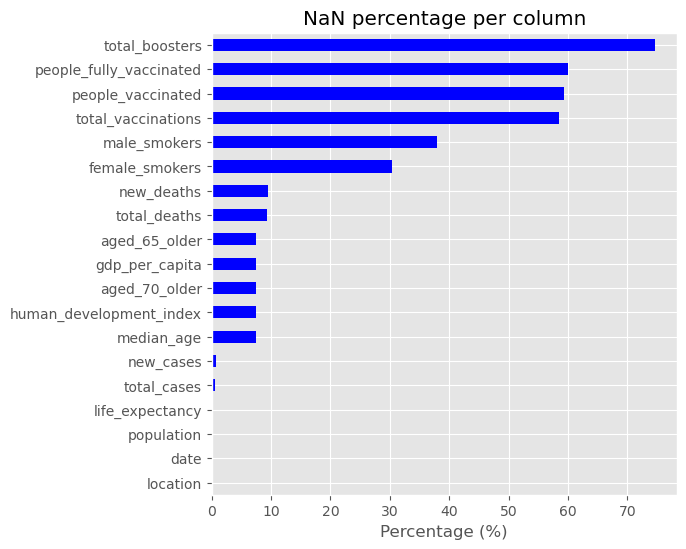

In [19]:
# Next there is a graphic where we can visualize better the percentage of Nan values in every column.
nan_percentage.sort_values(ascending=True) \
.plot(kind='barh',
      title='NaN percentage per column',
      figsize=(6,6),
      color='blue')
plt.xlabel("Percentage (%)")
plt.show()

We still have plenty of NaN values, but we can adjust them to our needs.
For example, the first four columns: `total_boosters`, `people_fully_vaccinated`, `people_vaccinated` and `total_vaccinations` represent the vaccination related data. As we know, vaccines  started to be applied several weeks/months after pandemic began, so is perfectly understood to have null values.

To address this situation, first, we are going to check if theres any negative invalid value inside the dataframe. The presence of any negative number in this specific dataframe it is .

In [20]:
# we define the column types we are going to check
col=df_2.select_dtypes(include=['float64','int64']).columns

negatives = []

for i in col:
    y = any(x < 0 for x in df_2[i])
    if y == True:
        negatives.append(y)
print(f'There are {len(negatives)} negative values in the data frame')

There are 0 negative values in the data frame


We don't need to deal with negative values in this dataframe, so now we can check wich values are zero.

In [21]:
df_2.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
count,1.223600e+04,12205.000000,11161.000000,11138.000000,5.097000e+03,5.012000e+03,4.913000e+03,3.127000e+03,1.229900e+04,11384.000000,11384.000000,11384.000000,11384.000000,8571.000000,7627.000000,12299.000000,11384.000000
mean,2.302889e+06,5237.840885,66860.500941,117.235231,5.145061e+07,2.456078e+07,2.025884e+07,1.305318e+07,3.370383e+07,30.235892,8.297207,5.200392,13878.807188,11.001248,24.684437,75.584494,0.763813
std,5.527998e+06,15031.781166,136046.689850,313.649001,9.401291e+07,4.332640e+07,3.672211e+07,2.296692e+07,5.488951e+07,3.327718,2.575543,1.983010,4896.690297,9.340868,11.031226,3.340154,0.050872
min,1.000000e+00,0.000000,1.000000,0.000000,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,3.764000e+03,25.400000,5.305000,2.837000,6885.829000,2.000000,12.300000,69.910000,0.682000
25%,2.346100e+04,9.000000,1226.000000,1.000000,3.555560e+06,2.363506e+06,1.490396e+06,5.928475e+05,3.426260e+06,28.100000,6.704000,4.229000,10581.936000,4.800000,17.900000,72.060000,0.728000
50%,3.996810e+05,485.000000,13984.000000,12.000000,1.458342e+07,9.275748e+06,6.221957e+06,2.842342e+06,1.779774e+07,29.600000,7.151000,4.455000,13767.119000,7.400000,21.600000,76.670000,0.765000
75%,1.634489e+06,2866.000000,59845.000000,71.000000,5.738438e+07,2.619828e+07,2.156130e+07,1.718396e+07,3.371547e+07,32.525000,11.087000,6.938000,18933.907000,14.000000,27.700000,77.290000,0.817000
max,3.469902e+07,287149.000000,686573.000000,4148.000000,4.729723e+08,1.873277e+08,1.722647e+08,1.188146e+08,2.143262e+08,35.600000,14.655000,10.361000,22767.037000,34.200000,42.900000,81.440000,0.851000


As we can observe, the columns `new_cases`, `new_deaths`, `total_vaccinations` and `people_vaccinated` have values that are zero. In this case, because we know the meaning of every column, the zero values are not a problem, so we can leave them like that.

Now, we should look for duplicates to delete.

In [22]:
# To watch for duplicates in general:
df_2.loc[df_2.duplicated()]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index


In [23]:
# We can use a subset to search for a duplicate value within a specified column:
df_2.loc[df_2.duplicated(subset=['location', 'total_cases'])]

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
1,Argentina,2020-01-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
5,Argentina,2020-01-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12280,Venezuela,2022-09-17,544090.0,0.0,5809.0,0.0,NaN,NaN,NaN,NaN,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711
12285,Venezuela,2022-09-22,544310.0,0.0,5814.0,0.0,NaN,NaN,NaN,NaN,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711
12288,Venezuela,2022-09-25,544450.0,0.0,5814.0,0.0,NaN,NaN,NaN,NaN,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711
12292,Venezuela,2022-09-29,544687.0,0.0,5814.0,0.0,NaN,NaN,NaN,NaN,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711


It seems that there are duplicated rows inside the dataframe. It could be because the data acquired is presented day by day, so little changes can occur from one day to another. For the porpuse of this project we are going to keep this rows.

So finally we can re-evaluate the NaN values to something that makes sense. For example with the column `total_boosters`, or even with the columns listed before, we can set the NaN values as zero. This method can be used as long as we take this into account when delivering the results of the analysis made.

In [24]:
fill_cols = ['total_cases', 'new_cases', 'total_deaths', 'new_deaths', 'total_vaccinations', 'people_vaccinated', 'total_boosters', 'people_fully_vaccinated']

for i in df_2.columns:
    if i in fill_cols:
        df_2[i] = df_2[i].fillna(0)
df_2

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,Venezuela,2022-10-01,544860.0,57.0,5816.0,2.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711
12295,Venezuela,2022-10-02,544874.0,14.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711
12296,Venezuela,2022-10-03,544884.0,10.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711
12297,Venezuela,2022-10-04,544884.0,0.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,NaN,NaN,72.06,0.711


In [25]:
# we check again th changes
df_2.isna().sum().sort_values(ascending=False)

male_smokers               4672
female_smokers             3728
human_development_index     915
gdp_per_capita              915
aged_70_older               915
aged_65_older               915
median_age                  915
population                    0
life_expectancy               0
location                      0
date                          0
people_fully_vaccinated       0
people_vaccinated             0
total_vaccinations            0
new_deaths                    0
total_deaths                  0
new_cases                     0
total_cases                   0
total_boosters                0
dtype: int64

We still have NaN values, but now we can see a patron in them. That values could be from the same country, so we have to check.

In [26]:
new_df = df_2.fillna(0)
new_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12294,Venezuela,2022-10-01,544860.0,57.0,5816.0,2.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
12295,Venezuela,2022-10-02,544874.0,14.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
12296,Venezuela,2022-10-03,544884.0,10.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
12297,Venezuela,2022-10-04,544884.0,0.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711


In [27]:
# we can inspect the dataframe with df.query()
new_df.query('human_development_index == 0')

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
5750,Falkland Islands,2020-04-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5751,Falkland Islands,2020-04-05,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5752,Falkland Islands,2020-04-06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5753,Falkland Islands,2020-04-07,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5754,Falkland Islands,2020-04-08,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,Falkland Islands,2022-10-01,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6661,Falkland Islands,2022-10-02,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6662,Falkland Islands,2022-10-03,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6663,Falkland Islands,2022-10-04,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0


In [28]:
new_df.query('location == "Falkland Islands"')

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
5750,Falkland Islands,2020-04-04,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5751,Falkland Islands,2020-04-05,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5752,Falkland Islands,2020-04-06,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5753,Falkland Islands,2020-04-07,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
5754,Falkland Islands,2020-04-08,5.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6660,Falkland Islands,2022-10-01,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6661,Falkland Islands,2022-10-02,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6662,Falkland Islands,2022-10-03,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0
6663,Falkland Islands,2022-10-04,1930.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3764.0,0.0,0.0,0.0,0.0,0.0,0.0,81.44,0.0


In [29]:
# count how many times the rows appears in the dataframe
new_df.value_counts('location')

location
Argentina           1009
Chile                956
Brazil               953
Ecuador              949
Colombia             944
Peru                 944
Paraguay             943
Bolivia              939
Guyana               938
Uruguay              937
Suriname             936
Venezuela            936
Falkland Islands     915
dtype: int64

After comparing both queries and the description obtained after and before the NaN changes, I decided to drop the rows with data from Falkland Islands due to the lack of information in general from that location.

In [30]:
new_df = new_df.loc[~(new_df['location'] == "Falkland Islands")] \
.reset_index(drop=True).copy()
new_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,Venezuela,2022-10-01,544860.0,57.0,5816.0,2.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
11380,Venezuela,2022-10-02,544874.0,14.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
11381,Venezuela,2022-10-03,544884.0,10.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
11382,Venezuela,2022-10-04,544884.0,0.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711


#### **2.2 Giving format.**

Now, in order to use the column names as properties and take advantage of it, it's necessary to remove some special characters that some column names contain, for example, apostrophe `'`, hyphen `-`, quotation marks `"`, colon `:`, and slash `/`. Also if a column name contains spaces between their words; these spaces will be removed as well.

In this specific case, the column names were normalized by the author of the dataset, so it's not necessary to redo this step.

Just for conveniece, the column `date` will be splitted into `day`, `month`, `year`.

In [31]:
#change the type of the "date" column from object to datetime.
new_df['date'] = pd.to_datetime(df['date'])
new_df

,location,date,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
0,Argentina,2020-01-01,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
1,Argentina,2020-01-02,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
2,Argentina,2020-01-03,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
3,Argentina,2020-01-04,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
4,Argentina,2020-01-05,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,45276780.0,31.9,11.198,7.441,18933.907,16.2,27.7,76.67,0.845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11379,Venezuela,2020-03-30,544860.0,57.0,5816.0,2.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
11380,Venezuela,2020-03-31,544874.0,14.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
11381,Venezuela,2020-04-01,544884.0,10.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711
11382,Venezuela,2020-04-02,544884.0,0.0,5816.0,0.0,0.0,0.0,0.0,0.0,28199866.0,29.0,6.614,3.915,16745.022,0.0,0.0,72.06,0.711


In [32]:
# # we can create a dictionary of lists to store the splitted values
# date = {'day' : [],
#         'month' : [],
#         'year' : []
#         }

# for i in new_df['date']:
#     splitted = i.split("-")
#     date['day'].append(splitted[2])
#     date['month'].append(splitted[1])
#     date['year'].append(splitted[0])

# # we add the new columns to new_df
# new_df['day'] = date['day']
# new_df['month'] = date['month']
# new_df['year'] = date['year']

# # we drop the date column
# new_df.drop('date', axis=1)

***
---

### **3. Exploratory Data Analysis (EDA) and Visualization.**

To find insight from our dataset, we'll explore its variables. This exploratory analysis will help us to understand how the variables interact and how representative they are. In the end, it'll help us to formulate hypotheses to reach the goal of the project and think about future works. 

Let's begin with a description of the information about each column and a plot of the increase of total cases through time.

In [33]:
new_df.describe()

,total_cases,new_cases,total_deaths,new_deaths,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,population,median_age,aged_65_older,aged_70_older,gdp_per_capita,female_smokers,male_smokers,life_expectancy,human_development_index
count,1.138400e+04,11384.000000,11384.000000,11384.000000,1.138400e+04,1.138400e+04,1.138400e+04,1.138400e+04,1.138400e+04,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000,11384.000000
mean,2.475214e+06,5615.417779,65550.777495,114.701862,2.303617e+07,1.081330e+07,8.743118e+06,3.585495e+06,3.641251e+07,30.235892,8.297207,5.200392,13878.807188,8.282827,16.537966,75.113852,0.763813
std,5.693814e+06,15496.187161,135025.796988,310.709332,6.790766e+07,3.122556e+07,2.612668e+07,1.337182e+07,5.618196e+07,3.327718,2.575543,1.983010,4896.690297,9.391916,14.705859,3.012611,0.050872
min,0.000000e+00,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.129840e+05,25.400000,5.305000,2.837000,6885.829000,0.000000,0.000000,69.910000,0.682000
25%,5.698925e+04,33.000000,1137.500000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.703799e+06,28.100000,6.704000,4.229000,10581.936000,2.000000,0.000000,72.060000,0.728000
50%,4.614395e+05,650.000000,12920.000000,11.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.949318e+07,29.600000,7.151000,4.455000,13767.119000,5.000000,17.900000,76.670000,0.765000
75%,1.850290e+06,3417.250000,58596.000000,67.000000,1.148524e+07,6.771482e+06,4.061814e+06,3.677500e+02,4.527678e+07,32.525000,11.087000,6.938000,18933.907000,14.000000,27.700000,77.010000,0.817000
max,3.469902e+07,287149.000000,686573.000000,4148.000000,4.729723e+08,1.873277e+08,1.722647e+08,1.188146e+08,2.143262e+08,35.600000,14.655000,10.361000,22767.037000,34.200000,42.900000,80.180000,0.851000


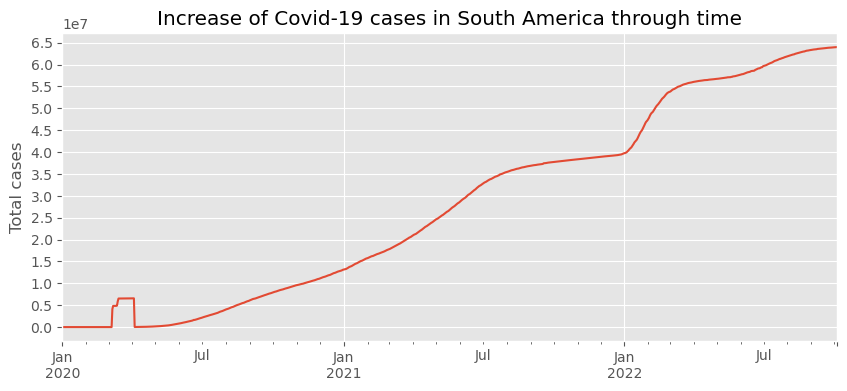

In [34]:
cases_date = new_df.groupby('date')['total_cases'].sum() 

plt.figure(figsize=(10,4))

ax = cases_date.plot(kind='line',
                x='date',
                y='total_cases')
ax.set(xlabel='', ylabel='Total cases', title='Increase of Covid-19 cases in South America through time')
plt.yticks(np.arange(0,70e6,5e6))
plt.show()

Between March and April the virus started to spread across the world, that is why we can observe an irregular peak on the plot at that point.

Now, paying more attention to the description of the data, it seems that the difference between 50% and max `total_cases` and `total_deaths` is pretty big.

To visualize this better we can create some plots.

In [35]:
# we create a df grouping by country and total cases.
max_total_cases_country = pd.DataFrame(new_df.groupby('location')['total_cases']. \
                                max()).sort_values(by='total_cases',ascending=False)

# the location index can be used as a column of the max_total_cases_country df.
max_total_cases_country['location'] = max_total_cases_country.index


# we create a df grouping by country and total deaths.
max_total_deaths_country = pd.DataFrame(new_df.groupby('location')['total_deaths'] \
                                .max()).sort_values(by='total_deaths', ascending=False)

# the location index can be used as a column of the max_total_deaths_country df.
max_total_deaths_country['location'] = max_total_deaths_country.index

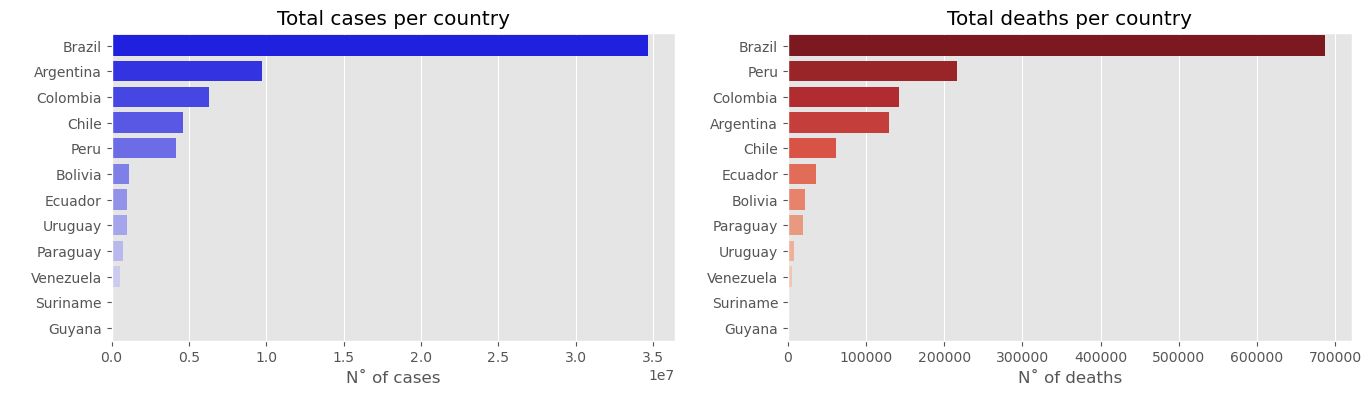

In [36]:
plt.figure(figsize=(16,4))

# we plot a horizontal bar graph to visualize the max total cases per country
plt.subplot(1,2,1) # figure place
ax = sns.barplot(data=max_total_cases_country,
            x='total_cases',
            y='location',
            palette="light:b_r")
ax.set(xlabel='N˚ of cases', ylabel=' ', title='Total cases per country')


plt.subplot(1,2,2) # figure place
ax = sns.barplot(data=max_total_deaths_country,
            x='total_deaths',
            y='location',
            palette='Reds_r')
ax.set(xlabel='N˚ of deaths', ylabel=' ', title='Total deaths per country')

plt.show()

At first glance, Brazil is by far the country from South America with the biggest number of cases and deaths since january 2020, until october 2022. However, Brazil is also the fifth biggest country in the world. So, to make a better analysis, we should use rate of infected per country and rate of death infected per country, instead of the absolute values.

* First create a new dataframe with the data we want to visualize.

In [37]:
# pandas serie with population grouped by country
mean_population = new_df.groupby('location')['population'].mean()
mean_population

# new df with the data to analyze
new_perc = max_total_deaths_country.copy()
new_perc['population'] = mean_population[:]
new_perc['total_cases'] = max_total_cases_country['total_cases']

# columns with percentage data
new_perc['tc_perc'] = new_perc['total_cases'] / new_perc['population'] * 100
new_perc['td_perc'] = new_perc['total_deaths'] / new_perc['total_cases'] * 100

new_perc

,total_deaths,location,population,total_cases,tc_perc,td_perc
location,,,,,,
Brazil,686573.0,Brazil,214326223.0,34699017.0,16.189814,1.978653
Peru,216626.0,Peru,33715472.0,4146000.0,12.297025,5.224940
Colombia,141794.0,Colombia,51516562.0,6307372.0,12.243387,2.248068
Argentina,129937.0,Argentina,45276780.0,9711355.0,21.448864,1.337990
Chile,61233.0,Chile,19493184.0,4638238.0,23.794153,1.320178
Ecuador,35900.0,Ecuador,17797737.0,1006070.0,5.652797,3.568340
Bolivia,22237.0,Bolivia,12079472.0,1108472.0,9.176494,2.006095
Paraguay,19591.0,Paraguay,6703799.0,716543.0,10.688611,2.734100
Uruguay,7495.0,Uruguay,3426260.0,986446.0,28.790751,0.759798


* Then, create the plots.

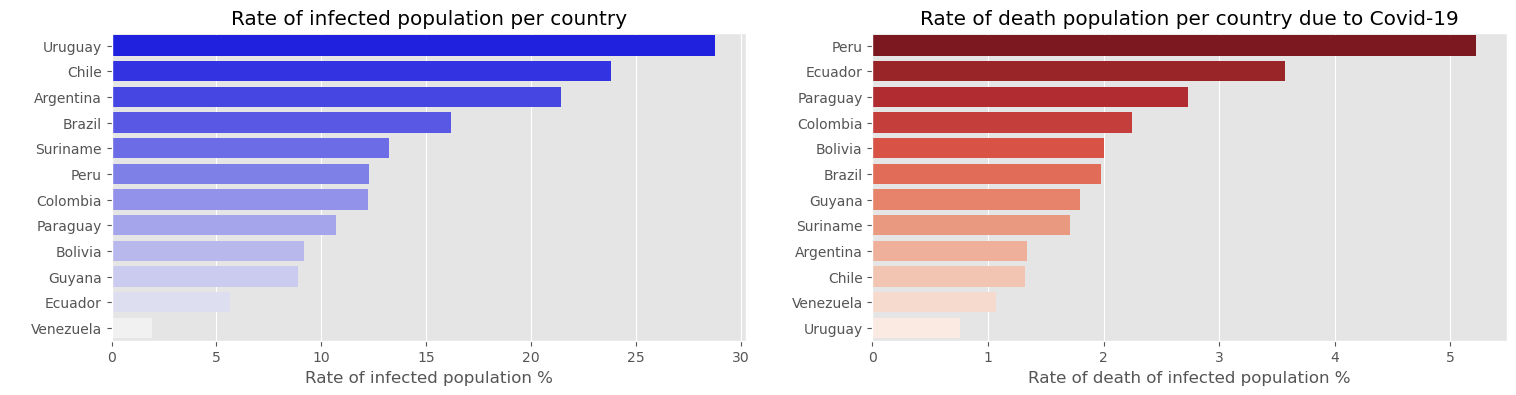

In [38]:
plt.figure(figsize=(18,4))

plt.subplot(1,2,1)
fig_1 = sns.barplot(data=new_perc. \
sort_values(by='tc_perc',ascending=False),
            x='tc_perc',
            y='location',
            palette='light:b_r',
            orientation='horizontal')
fig_1.set(xlabel='Rate of infected population %',
          ylabel=' ',
          title='Rate of infected population per country')


plt.subplot(1,2,2)
fig_2 = sns.barplot(data=new_perc. \
sort_values(by='td_perc', ascending=False),
            x='td_perc',
            y='location',
            palette='Reds_r',
            orientation='horizontal')
fig_2.set(xlabel='Rate of death of infected population %',
          ylabel=' ',
          title='Rate of death population per country due to Covid-19')

plt.show()

We can see that Brazil is not the "worst" from the list of countries analyzed. Despite having the largest total number of Covid-19 cases and deaths, countries like Uruguay, Chile and Argentina were more affected in terms of rate of infections; while Peru, Ecuador and Paraguay were more affected in terms of rate of deaths due to Covid-19. 

Now that we have a better understanding of the information available, we can start asking more specific questions.

For example:

***Q1: Did countries with more smokers had a bigger rate of death between the infected?***

and,

***Q2: Is the rate of death higher in countries with a big share of the population older than 65 years old?***

To visualize and answer Q1, we can create a new column that groups male and female smokers.

Due to the lack of information about the share of male and female population in this dataset, we can make an approximation with the mean of the values of the columns `female_smokers` and `male_smokers`


In [39]:
new_df_2 = new_df.copy()
new_df_2['total_smokers'] = (new_df['male_smokers'] + new_df['female_smokers']) / 2

mean_smokers = new_df_2.groupby('location')['total_smokers'].mean()
mean_smokers

new_perc['total_smokers'] = mean_smokers[:]
new_perc

,total_deaths,location,population,total_cases,tc_perc,td_perc,total_smokers
location,,,,,,,
Brazil,686573.0,Brazil,214326223.0,34699017.0,16.189814,1.978653,14.00
Peru,216626.0,Peru,33715472.0,4146000.0,12.297025,5.224940,2.40
Colombia,141794.0,Colombia,51516562.0,6307372.0,12.243387,2.248068,9.10
Argentina,129937.0,Argentina,45276780.0,9711355.0,21.448864,1.337990,21.95
Chile,61233.0,Chile,19493184.0,4638238.0,23.794153,1.320178,37.85
Ecuador,35900.0,Ecuador,17797737.0,1006070.0,5.652797,3.568340,7.15
Bolivia,22237.0,Bolivia,12079472.0,1108472.0,9.176494,2.006095,0.00
Paraguay,19591.0,Paraguay,6703799.0,716543.0,10.688611,2.734100,13.30
Uruguay,7495.0,Uruguay,3426260.0,986446.0,28.790751,0.759798,16.95


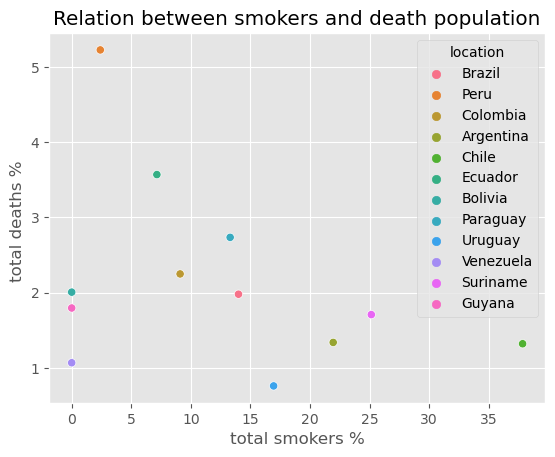

In [40]:
fig = sns.scatterplot(data=new_perc, hue='location', y='td_perc', x='total_smokers')
fig.set(xlabel='total smokers %',
          ylabel='total deaths % ',
          title='Relation between smokers and death population')
plt.show()

We can observe that there is no apparent relationship between the share of population that smokes and the rate of death.
Chile, Argentina and Guyana for example have the biggest share of smokers from South America, but despite this, this countries have the lowest rate of death due to Covid-19. 

To answer Q2, we can do something very similary but using the share of population older than 65 years old. 

In [41]:
new_df_2['older_than_65'] = new_df_2['aged_65_older'] + new_df_2['aged_70_older']

older = new_df_2.groupby('location')['older_than_65'].mean()

new_perc['older_than_65'] = older[:]
new_perc

,total_deaths,location,population,total_cases,tc_perc,td_perc,total_smokers,older_than_65
location,,,,,,,,
Brazil,686573.0,Brazil,214326223.0,34699017.0,16.189814,1.978653,14.00,13.612
Peru,216626.0,Peru,33715472.0,4146000.0,12.297025,5.224940,2.40,11.606
Colombia,141794.0,Colombia,51516562.0,6307372.0,12.243387,2.248068,9.10,11.958
Argentina,129937.0,Argentina,45276780.0,9711355.0,21.448864,1.337990,21.95,18.639
Chile,61233.0,Chile,19493184.0,4638238.0,23.794153,1.320178,37.85,18.025
Ecuador,35900.0,Ecuador,17797737.0,1006070.0,5.652797,3.568340,7.15,11.562
Bolivia,22237.0,Bolivia,12079472.0,1108472.0,9.176494,2.006095,0.00,11.097
Paraguay,19591.0,Paraguay,6703799.0,716543.0,10.688611,2.734100,13.30,10.211
Uruguay,7495.0,Uruguay,3426260.0,986446.0,28.790751,0.759798,16.95,25.016


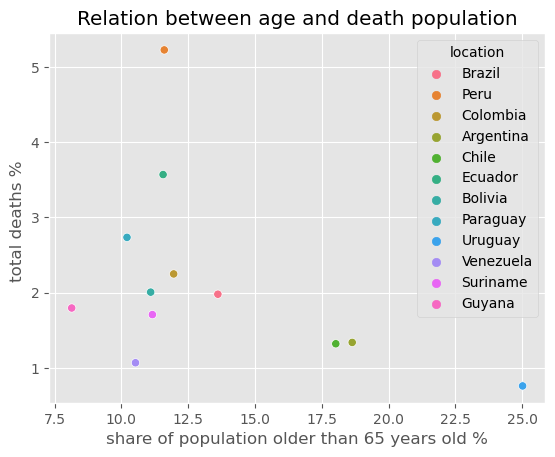

In [42]:
fig = sns.scatterplot(data=new_perc, hue='location', y='td_perc', x='older_than_65')
fig.set(xlabel='share of population older than 65 years old %',
          ylabel='total deaths % ',
          title='Relation between age and death population')
plt.show()

It looks like again, there is no apparent relationship between the rate of death and the share of older than 65 years old population per se, but is known that older people, smokers, and people with determined illnesses is more vulnerable against Covid-19, so this is something that needs to be analyzed with more detailed data.

Some other questions that seemed interesting to answer after analysing the data available were:

***Q3: Which countries were the first to start applying vaccines against Covid-19? Are these countries the more developed?***

and,

***Q4: Is human development index related to the number of infections? In other words, are countries less developed more affected by the virus?***

For Q3 we can group the data by country and visualize when vaccines started to be applied after pandemic began.

In [43]:
df_q3 = new_df.query('total_vaccinations == 0 and total_cases != 0').reset_index(drop=True).copy()

vaccine_date = pd.DataFrame(df_q3.groupby('location')['date'].min())
vaccine_date['location']=vaccine_date.index

vaccine_date

,date,location
location,,
Argentina,2020-03-03,Argentina
Bolivia,2020-03-11,Bolivia
Brazil,2020-02-26,Brazil
Chile,2020-02-23,Chile
Colombia,2020-03-06,Colombia
Ecuador,2020-03-01,Ecuador
Guyana,2020-03-12,Guyana
Paraguay,2020-03-07,Paraguay
Peru,2020-03-31,Peru


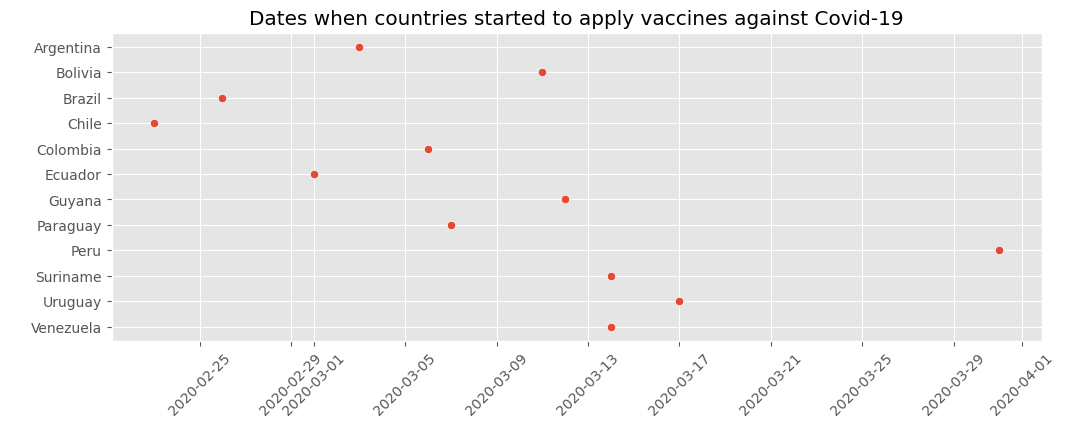

In [44]:
plt.figure(figsize=(12,4))
fig = sns.scatterplot(data=vaccine_date,x='date',y='location')
fig.set(xlabel=' ',ylabel=' ',title='Dates when countries started to apply vaccines against Covid-19')
plt.xticks(rotation=45)
plt.show()

Chile, Brazil and Ecuador where the first three countries to start vaccinating in South America, but are these the most developed countries from the continent? Let's see.

In [45]:
human_index = df_q3.groupby('location')['human_development_index'].mean()
human_index.sort_values(ascending=False)

location
Chile        0.851
Argentina    0.845
Uruguay      0.817
Peru         0.777
Colombia     0.767
Brazil       0.765
Ecuador      0.759
Suriname     0.738
Paraguay     0.728
Bolivia      0.718
Venezuela    0.711
Guyana       0.682
Name: human_development_index, dtype: float64

We can see that Chile is the most developed country from South America according to this dataset, but Brazil and Ecuador aren't in the top three.
With this is mind, we can hypothesize that human index development didn't influence too much on the datetime where the countries started to vaccinate.

Now, for Q4 we can use a plot comparing the rate of infected vs. the rate of deaths due to Covid-19 and use the `human_development_index` of every country to make a better visual analysis.

In [46]:
new_perc['human_development_index']=human_index
new_perc

,total_deaths,location,population,total_cases,tc_perc,td_perc,total_smokers,older_than_65,human_development_index
location,,,,,,,,,
Brazil,686573.0,Brazil,214326223.0,34699017.0,16.189814,1.978653,14.00,13.612,0.765
Peru,216626.0,Peru,33715472.0,4146000.0,12.297025,5.224940,2.40,11.606,0.777
Colombia,141794.0,Colombia,51516562.0,6307372.0,12.243387,2.248068,9.10,11.958,0.767
Argentina,129937.0,Argentina,45276780.0,9711355.0,21.448864,1.337990,21.95,18.639,0.845
Chile,61233.0,Chile,19493184.0,4638238.0,23.794153,1.320178,37.85,18.025,0.851
Ecuador,35900.0,Ecuador,17797737.0,1006070.0,5.652797,3.568340,7.15,11.562,0.759
Bolivia,22237.0,Bolivia,12079472.0,1108472.0,9.176494,2.006095,0.00,11.097,0.718
Paraguay,19591.0,Paraguay,6703799.0,716543.0,10.688611,2.734100,13.30,10.211,0.728
Uruguay,7495.0,Uruguay,3426260.0,986446.0,28.790751,0.759798,16.95,25.016,0.817


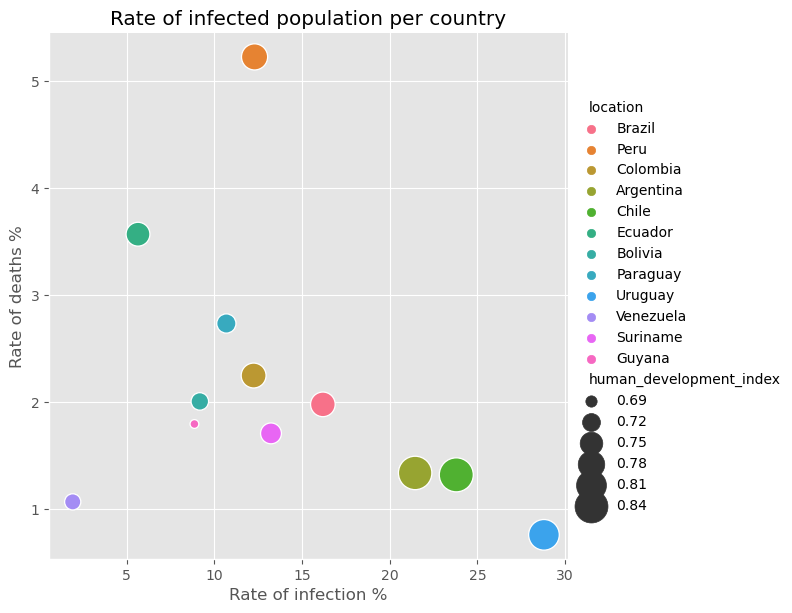

In [47]:
fig_1 = sns.relplot(data=new_perc,
            x='tc_perc',
            y='td_perc',
            hue='location',
            size='human_development_index',
            sizes=(40,600),
            height=6)
fig_1.set(xlabel='Rate of infection %',
          ylabel='Rate of deaths %',
          title='Rate of infected population per country')

plt.show()

We can observe that the human development index seems not to be related to the rate of death and infected. Some countries with a better development index had more infected population and more deaths than some other countries with less development.  

### **4. Inferences and Conclusion.**

* There is no apparent relationship between the share of population that smokes and the rate of death.

* There is no apparent relationship between the rate of death and the share of older than 65 years old population per se, but is known that older people, smokers, and people with determined illnesses is more vulnerable against Covid-19.

* At first glance, human index development didn't influence too much on the datetime where the countries started to vaccinate.

* Human development index seems not to be related to the rate of death and infected. Some countries with a better development index had more infected population and more deaths than some other countries with less development.  

#### **Future work.**

* A possible future work could make a similar analysis but making a stronger emphasis on the population most common diseases and it's relationship with Covid-19.

* It could also be interesting to analyse the vaccines brands applied to the population, the number of doses, secondary effects, etc. 